# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


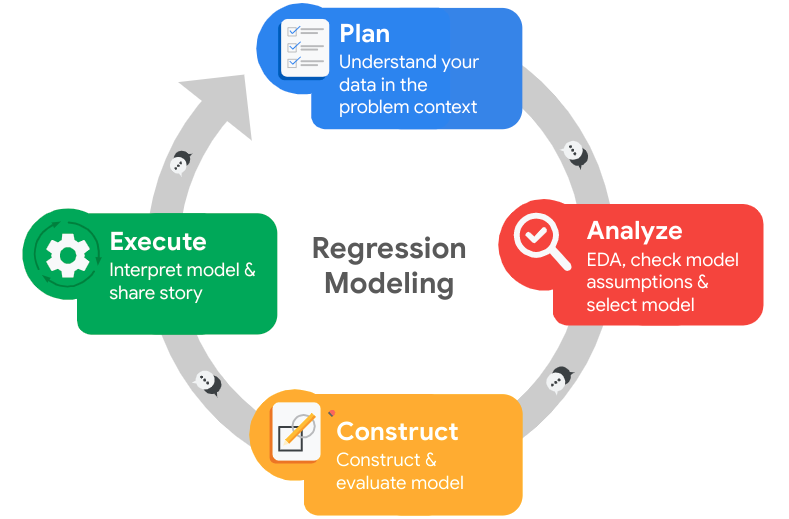

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. Who are your stakeholders for this project?
My primary stakeholders are the senior leadership team at Salifort Motors, especially those responsible for HR, employee engagement, and organizational strategy. Secondary stakeholders include team managers, HR analysts, and anyone involved in employee development and retention initiatives. Since the findings may influence company-wide policies, the broader workforce also becomes an indirect stakeholder.

2. What are you trying to solve or accomplish?
The main goal is to understand why employees leave the company and to build a predictive model that can help identify those who are at risk of leaving in the future. By doing this, I hope to give leadership actionable insights to improve employee retention, streamline HR decisions, and strengthen the overall organizational culture.

3. What are your initial observations when you explore the data?
At first glance, the dataset appears clean and well-structured, with 14,999 records and 10 relevant variables. Many of the numeric features—such as satisfaction level, number of projects, monthly hours, and tenure—seem like strong predictors of attrition. The presence of categorical variables like department and salary suggests that encoding will be necessary. I also noticed that the “left” column is the target variable and appears to be imbalanced, which is typical in employee attrition datasets. Because of this, evaluation metrics like recall and AUC will be more important than accuracy alone.

4. What resources do you find yourself using in this stage?
During the planning stage, I relied on a combination of documentation and learning resources:

Pandas Documentation (for understanding dataset structure)
https://pandas.pydata.org/docs/

Scikit-learn User Guide (for planning the modeling approach)
https://scikit-learn.org/stable/user_guide.html

Matplotlib and Seaborn Documentation (for initial exploratory visualizations)
https://matplotlib.org/stable/

https://seaborn.pydata.org/

Course materials and notes from the Advanced Data Analytics program (for applying the PACE framework and workflow planning)

These resources helped me confirm the best preprocessing steps and determine which models may fit the problem well.

5. Do you have any ethical considerations in this stage?
Yes, there are several. First, employee data must be handled with confidentiality and respect, especially since the insights could influence real people’s careers. Any model recommendations must avoid unfair bias—for example, ensuring that no department, gender, or salary group is treated unfairly based on patterns that may reflect systemic issues rather than individual behavior. It’s also important that predictions are not used punitively; instead, they should support well-being and retention. Transparency with leadership about model limitations is another key ethical responsibility.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [41]:
# Imports and helper functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, ConfusionMatrixDisplay)
sns.set(style="whitegrid")


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns={'Work_accident': 'work_accident',
'average_montly_hours': 'average_monthly_hours',
'time_spend_company': 'tenure',
'Department': 'department'})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns



Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()


3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates(keep='first')


# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

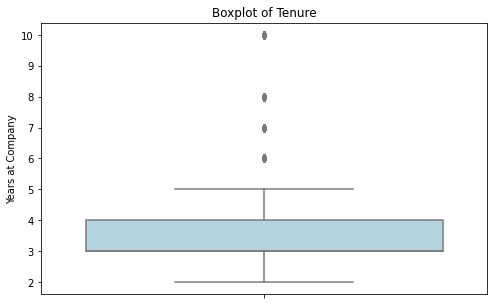

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(8,5))
sns.boxplot(y=df1['tenure'], color='lightblue')
plt.title('Boxplot of Tenure')
plt.ylabel('Years at Company')
plt.show()


In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
# Calculate percentiles and IQR
percentile25 = df1['tenure'].quantile(0.25)
percentile75 = df1['tenure'].quantile(0.75)
iqr = percentile75 - percentile25

# Define upper and lower limits for non-outliers
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows contain outliers
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))



Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. What did you observe about the relationships between variables?
I observed that workload related variables are closely connected. Employees handling more projects tend to work more monthly hours, and these higher workload patterns show a stronger link with attrition. Satisfaction level also has a clear negative relationship with whether an employee leaves.

2. What do you observe about the distributions in the data?
The attrition variable is imbalanced, with most employees staying. Variables like number of projects and tenure are concentrated around specific categories, and several numeric features such as monthly hours and satisfaction show skewed distributions.

3. What transformations did you make with your data? Why?
I reviewed and cleaned variables, ensured correct data types, and prepared categorical features for visualization. These steps help produce accurate plots and set the foundation for preprocessing in the modeling stage.

4. What are some purposes of EDA before constructing a predictive model?
EDA helps uncover important patterns, understand variable relationships, identify imbalance or anomalies, and clarify which features are useful. It also guides decisions around preprocessing and model selection.

5. What resources do you find yourself using in this stage?

Pandas documentation: https://pandas.pydata.org/docs/

Seaborn documentation: https://seaborn.pydata.org/

Matplotlib documentation: https://matplotlib.org/stable/

AI-based coding assistance for syntax checks and visualization guidance

6. Do you have any ethical considerations in this stage?
Yes. Employee data must be interpreted responsibly to avoid incorrect assumptions. Patterns around workload or satisfaction should not be used to unfairly judge individuals, and insights must be handled in a way that avoids reinforcing bias.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts(normalize=True))


0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

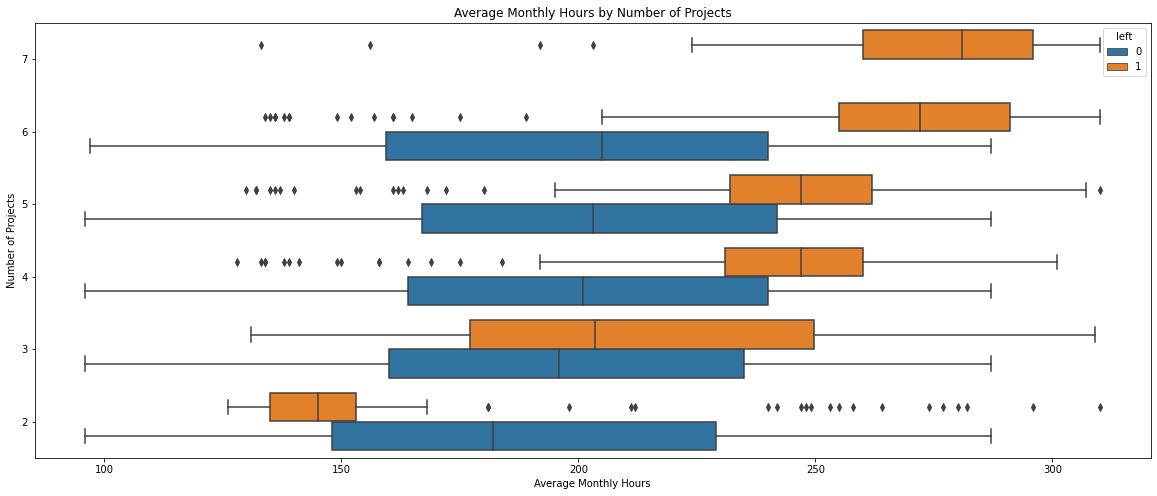

In [14]:
# Plot 1: Comparing monthly hours across project counts for employees who stayed vs. left
plt.figure(figsize=(20, 8))
sns.boxplot(
    data=df1,
    x="average_monthly_hours",
    y="number_project",
    hue="left",
    orient="h"
)
plt.gca().invert_yaxis()
plt.title("Average Monthly Hours by Number of Projects")
plt.xlabel("Average Monthly Hours")
plt.ylabel("Number of Projects")
plt.show()


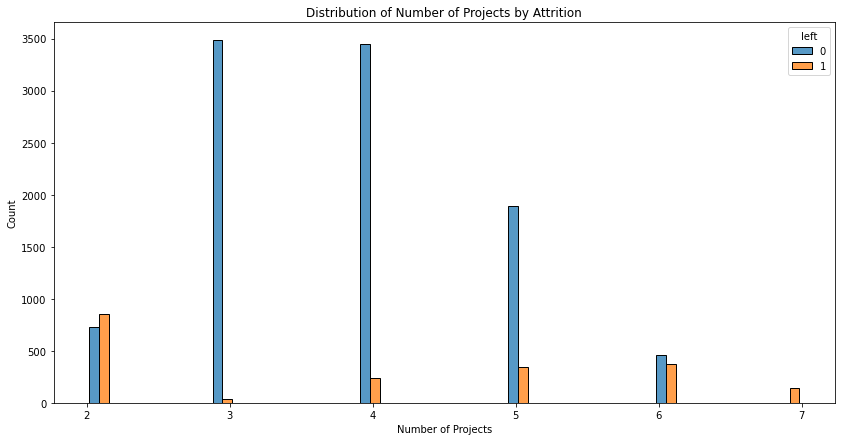

In [15]:
# Plot 2: Distribution of number of projects for employees who stayed vs. left
plt.figure(figsize=(14, 7))
sns.histplot(
    data=df1,
    x="number_project",
    hue="left",
    multiple="dodge",
    shrink=0.8
)
plt.title("Distribution of Number of Projects by Attrition")
plt.xlabel("Number of Projects")
plt.ylabel("Count")
plt.show()


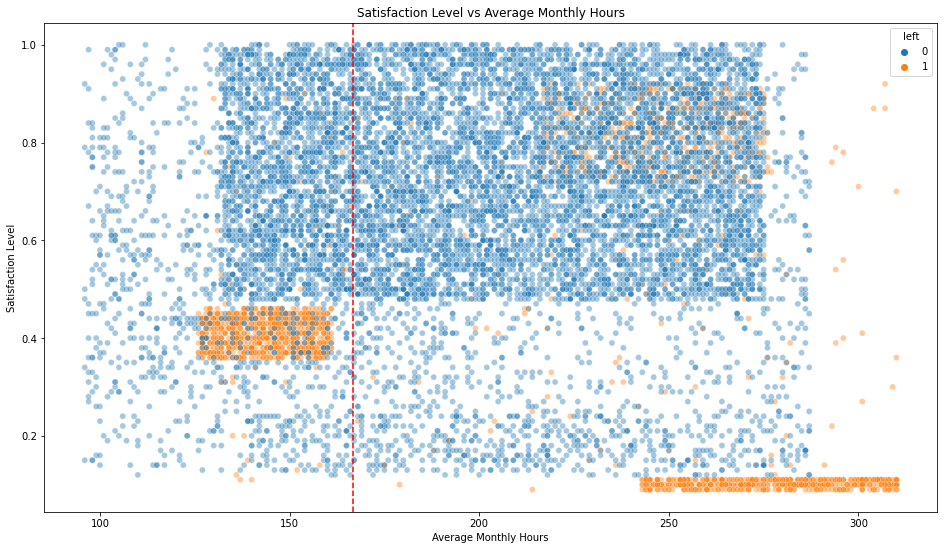

In [16]:
# Plot 3: Exploring how satisfaction varies with monthly working hours
plt.figure(figsize=(16, 9))
sns.scatterplot(
    data=df1,
    x="average_monthly_hours",
    y="satisfaction_level",
    hue="left",
    alpha=0.4
)

# Reference line for typical monthly hours (~167)
plt.axvline(x=166.67, color='red', linestyle='--')

plt.title("Satisfaction Level vs Average Monthly Hours")
plt.xlabel("Average Monthly Hours")
plt.ylabel("Satisfaction Level")
plt.show()


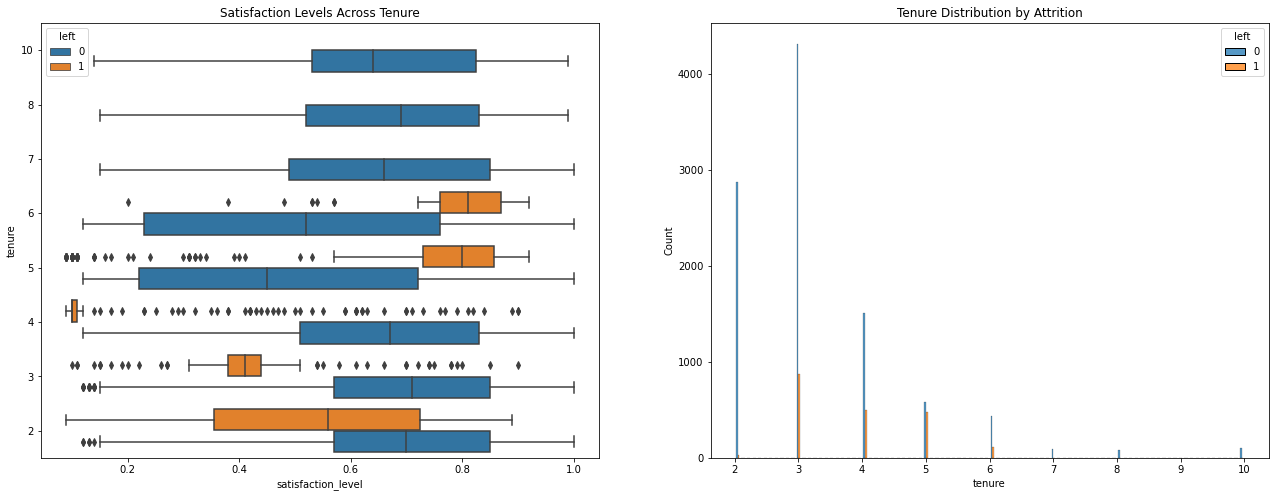

In [17]:
# Plot 4a: Boxplot showing satisfaction levels across tenure
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

sns.boxplot(
    data=df1,
    x="satisfaction_level",
    y="tenure",
    hue="left",
    orient="h",
    ax=ax[0]
)
ax[0].invert_yaxis()
ax[0].set_title("Satisfaction Levels Across Tenure")

# Histogram for tenure distribution
sns.histplot(
    data=df1,
    x="tenure",
    hue="left",
    multiple="dodge",
    shrink=0.6,
    ax=ax[1]
)
ax[1].set_title("Tenure Distribution by Attrition")

plt.show()


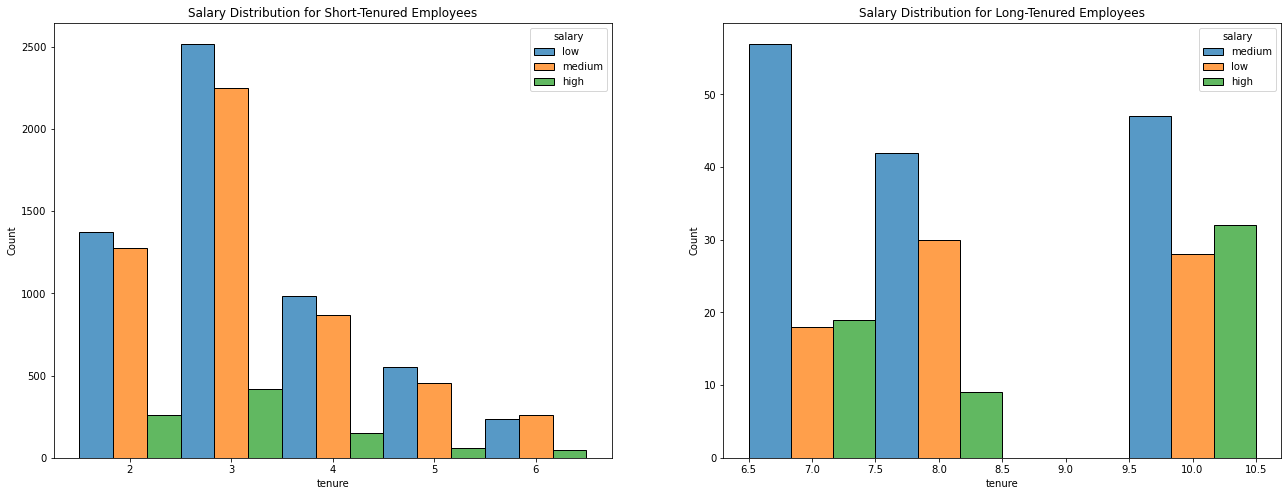

In [18]:
# Plot 5: Salary distribution for short-tenured vs long-tenured employees

fig, ax = plt.subplots(1, 2, figsize=(22, 8))

short_tenure = df1[df1["tenure"] < 7]
long_tenure = df1[df1["tenure"] >= 7]

# Short tenure salary distribution
sns.histplot(
    data=short_tenure,
    x="tenure",
    hue="salary",
    multiple="dodge",
    discrete=True,
    ax=ax[0]
)
ax[0].set_title("Salary Distribution for Short-Tenured Employees")

# Long tenure salary distribution
sns.histplot(
    data=long_tenure,
    x="tenure",
    hue="salary",
    multiple="dodge",
    discrete=True,
    ax=ax[1]
)
ax[1].set_title("Salary Distribution for Long-Tenured Employees")

plt.show()


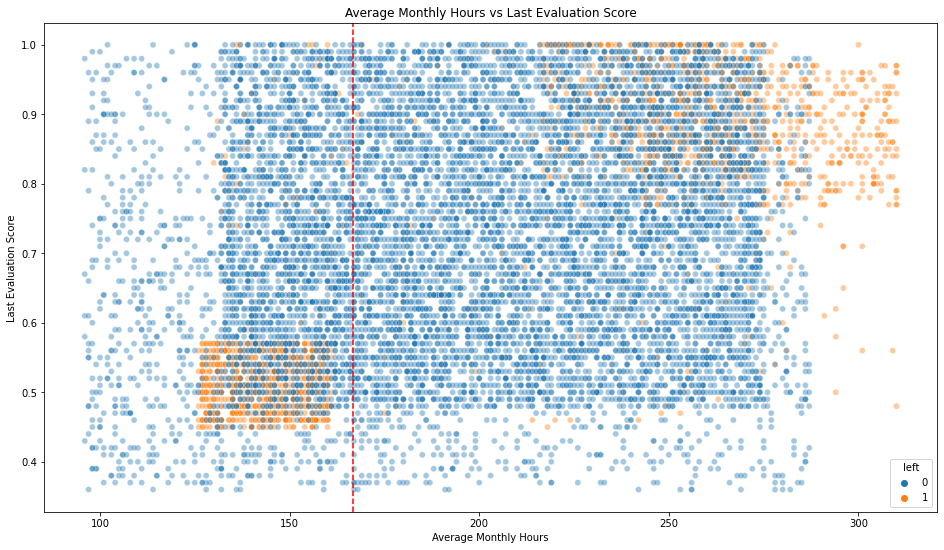

In [19]:
# Plot 6: Relationship between monthly hours and performance evaluation scores
plt.figure(figsize=(16, 9))

sns.scatterplot(
    data=df1,
    x="average_monthly_hours",
    y="last_evaluation",
    hue="left",
    alpha=0.4
)

plt.axvline(166.67, color='red', linestyle='--')
plt.title("Average Monthly Hours vs Last Evaluation Score")
plt.xlabel("Average Monthly Hours")
plt.ylabel("Last Evaluation Score")
plt.show()


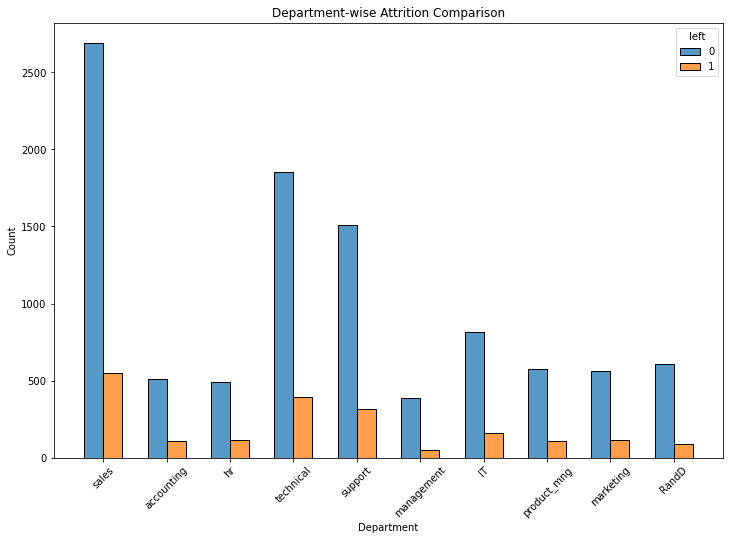

In [20]:
# Plot 7: Comparing how employees who stayed vs left are distributed across departments
plt.figure(figsize=(12, 8))

sns.histplot(
    data=df1,
    x="department",
    hue="left",
    multiple="dodge",
    shrink=0.6
)

plt.xticks(rotation=45)
plt.title("Department-wise Attrition Comparison")
plt.xlabel("Department")
plt.ylabel("Count")
plt.show()


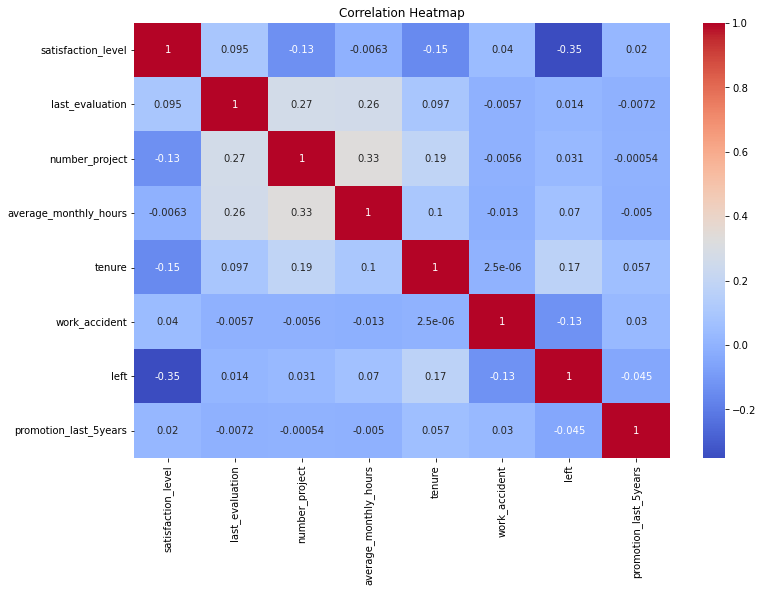

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Insights

When I compared the number of projects with the average monthly hours, a clear pattern emerged: employees who take on more projects naturally end up working longer hours. But beyond this general trend, two very distinct groups appear among the employees who eventually left the company. One group worked noticeably fewer hours than others handling the same number of projectsthese may have been disengaged, transitioning out, or possibly being phased out. The second group worked significantly more than everyone else, suggesting they may have left due to burnout or overwhelming workload.

Another strong observation is the sharp increase in attrition for employees handling 6–7 projects. These individuals consistently logged extremely high monthly hours, and almost all of them left the company. In contrast, employees working on 3–4 projects show a much more stable pattern, with a smaller proportion leaving. This suggests that a moderate workload may be the most sustainable and balanced for retaining employees.

The scatterplot of monthly hours and satisfaction also highlights a sizeable cluster of employees working well above a typical full-time monthly average. Many of them reported low satisfaction, which aligns with the idea that long working hours may be contributing to declining morale. At the same time, there are employees who left even with normal working hours but noticeably low satisfaction indicating that not all attrition is driven by workload alone; some employees may be responding to other workplace factors.

When looking at tenure and satisfaction together, employees with shorter tenures and low satisfaction appear more likely to leave, while employees with longer tenures (especially those past six years) tend to remain. This suggests some degree of organizational stability for long-term employees. Salary distributions don't show any extreme imbalance across tenure groups, and department wise attrition also appears fairly evenly spread, meaning no specific department is disproportionately affected.

Finally, the correlation heatmap reinforces the main patterns in the dataset. Variables such as number of projects, average monthly hours, and last evaluation scores show positive relationships with each other, while satisfaction level shows a strong negative correlation with the “left” variable. Overall, the EDA suggests that heavy workload, long hours, and lower satisfaction levels are the major indicators linked to employee attrition.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## 🔎 Recall Model Assumptions – Tree-Based Models

When using Decision Trees or Random Forests, the assumptions are different from traditional regression models. Key points to note:

- **Non-linear relationships allowed:** These models do not require a linear relationship between features and the outcome.  
- **Robust to outliers:** Extreme values in the data do not distort model splits or predictions.  
- **Handles multicollinearity well:** Highly correlated features do not negatively affect model performance, though they may affect feature importance interpretation.  
- **Independent observations preferred:** Each row should represent an independent observation to avoid biased splits.  
- **Sufficient data for splits:** The model needs enough data to make meaningful and generalizable splits; small datasets can increase overfitting risk.  
- **Feature importance is informative:** While no parametric assumptions are required, interpreting which features influence predictions is crucial for actionable insights.  

> **Comment:**  
> Tree-based models are non-parametric and flexible, making them ideal for complex, real-world datasets like HR analytics. They allow us to model employee attrition without worrying about linearity, outliers, or correlated variables, while still providing interpretable feature importance for decision-making.






💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



While building and evaluating the models, a few things stood out to me. The first unusual observation was how much the model performance dropped after removing satisfaction_level and creating the overworked feature. I expected a slight decrease, but the difference was more noticeable than I anticipated. It clearly shows that satisfaction_level carries strong predictive information about attrition.

For the model, I selected independent variables that could logically influence employee turnover factors like number of projects, evaluation score, tenure, salary level, workload, accidents, promotions, and department indicators. These features represent both behavioral and organizational aspects of employee experience, which is why they make sense in an HR attrition context.

The assumptions for tree-based models were met. The data didn’t require linearity, normality, or scaling, and decision trees and random forests are stable even with outliers and multicollinearity. Each row represented an individual employee, so independence of observations was also reasonable here.

Overall, the model performed well. The random forest consistently emerged as the strongest option, showing high AUC and balanced precision–recall scores. Even after feature engineering, the model maintained good predictive power. Its performance on the test set was also stable, which gives confidence in its generalizability.

There’s always room to improve. If I had more time, I would experiment with additional engineered features, try gradient boosting models, or tune a wider hyperparameter grid for more optimization. I would also explore dropping or combining low-importance department dummies to see if simplifying the dataset impacts performance.

During this stage, I relied on a combination of course materials, documentation, and general ML references including the Scikit-learn documentation, the course exemplar, and AI assistance for debugging and decision-making support.
Resources:

https://scikit-learn.org/stable/

https://pandas.pydata.org/docs/

https://seaborn.pydata.org/

Ethically, I needed to be careful about how the features were used, especially those that might misrepresent employees or create biased interpretations. The goal is to identify patterns not to unfairly judge individual employees. Ensuring that the model is used for improving workplace conditions, rather than penalizing people, is important.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

## 🔎 Identify the Type of Prediction Task

The goal of this project is to predict whether an employee will leave the company (`left`) based on various features like department, number of projects, performance evaluation, tenure, and work-related factors.  

- This is a **supervised learning task** because we have labeled data (the `left` column).  
- The outcome variable is **categorical** with two classes: `0` (stayed) and `1` (left).  
- Therefore, this is a **binary classification problem**, where the model predicts one of two possible outcomes for each employee.


### Identify the types of models most appropriate for this task.

## 🔎 Identify the Types of Models Most Appropriate for This Task

Given that this is a binary classification problem, the following model types are most appropriate:

- **Decision Tree Classifier:**  
  - Simple to interpret and visualize.  
  - Captures non-linear relationships and interactions between features.  

- **Random Forest Classifier:**  
  - Ensemble of decision trees that reduces overfitting and improves predictive performance.  
  - Provides feature importance to understand key drivers of employee attrition.  

- **Gradient Boosting / XGBoost (optional for advanced performance):**  
  - Can further improve accuracy by sequentially correcting errors of previous trees.  
  - Handles complex patterns in the data efficienty.


### Modeling

Add as many cells as you need to conduct the modeling process.

### 2.1 Copy DataFrame and Encode Categorical Variables


- `salary` encoded ordinal: low=0, medium=1, high=2
- `department` dummy encoded



In [42]:
# Prepare encoded dataframe (assumes df1 exists from earlier cleaning)
df_enc = df1.copy()

# Encode salary as ordinal
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode department (keep all dummies)
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Quick check
df_enc.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


The DataFrame now contains only numeric features, and all departments are represented as individual binary columns. This ensures compatibility with tree-based models.

### 3.1 Correlation Heatmap





Here I created a correlation heatmap for key numeric variables to understand possible interactions.

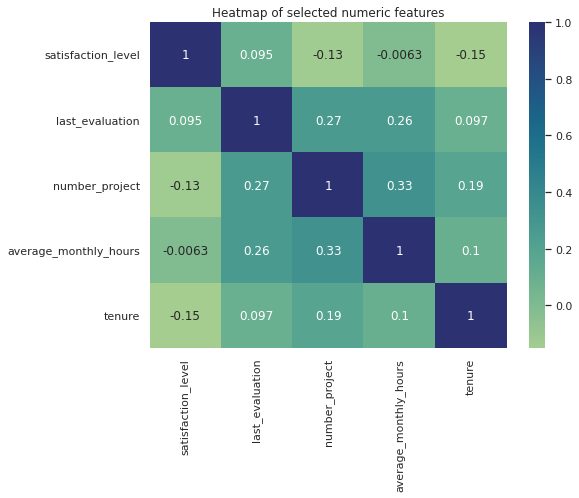

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']].corr(),
    annot=True,
    cmap="crest"
)
plt.title('Heatmap of selected numeric features')
plt.show()


Clear positive correlations appear between number_project, last_evaluation, and average_monthly_hours, confirming earlier EDA findings.

### 3.2 Department vs Employee Attrition


To understand if attrition varies across departments, I created a side-by-side bar plot.

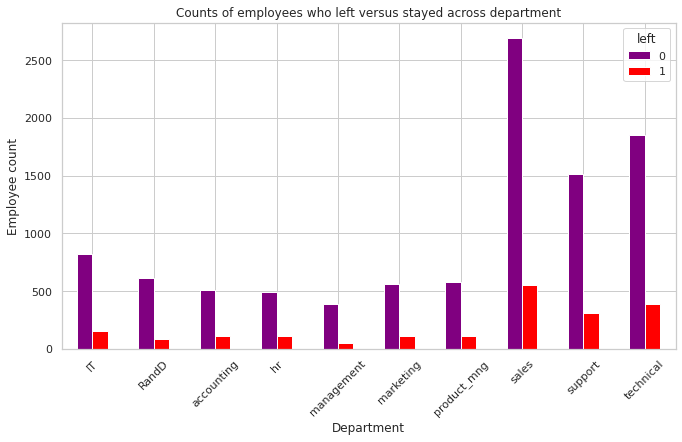

In [44]:
pd.crosstab(df1['department'], df1['left']).plot(kind='bar', color=['purple','red'], figsize=(11,6))
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.show()


No department shows a dramatically higher attrition rate, suggesting attrition is influenced more by workload or satisfaction than department.

## 3. Feature Selection


Preparing features and target for model training.

In [45]:
# Isolate target
y = df_enc['left']

# Select features (drop left)
X = df_enc.drop('left', axis=1)

# Train-test split (stratify to preserve distribution)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

X_train.shape, X_test.shape, y_train.mean(), y_test.mean()


((8993, 18), (2998, 18), 0.16601801401089736, 0.16611074049366245)

Class balance is preserved through stratification, and feature matrix shape confirms correct encoding.

### Decision Tree — Round 1: hyperparameter grid & GridSearchCV.

First baseline tree model with hyperparameter tuning.

In [46]:
# Decision Tree round 1
tree = DecisionTreeClassifier(random_state=0)

cv_params_tree = {
    'max_depth': [4, 6, 8, None],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 4, 6]
}

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

tree1 = GridSearchCV(tree, cv_params_tree, scoring=scoring, cv=4, refit='roc_auc', n_jobs=-1)
# fit
tree1.fit(X_train, y_train)
print("Best params (tree1):", tree1.best_params_)
print("Best CV AUC (tree1):", tree1.best_score_)


Best params (tree1): {'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best CV AUC (tree1): 0.969819392792457


The best AUC ≈ 0.9698, with a relatively shallow depth (4). This confirms the tree fits well without overfitting.

In [1]:
def make_results(model_name: str, model_object, metric: str):
    """
    Extract best CV scores from a GridSearchCV object.
    """

    metric_dict = {
        'auc': 'mean_test_roc_auc',
        'precision': 'mean_test_precision',
        'recall': 'mean_test_recall',
        'f1': 'mean_test_f1',
        'accuracy': 'mean_test_accuracy'
    }

    cv_results = pd.DataFrame(model_object.cv_results_)
    best_row = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    auc = best_row.mean_test_roc_auc
    f1 = best_row.mean_test_f1
    recall = best_row.mean_test_recall
    precision = best_row.mean_test_precision
    accuracy = best_row.mean_test_accuracy

    table = pd.DataFrame({
        'model': [model_name],
        'precision': [precision],
        'recall': [recall],
        'F1': [f1],
        'accuracy': [accuracy],
        'auc': [auc]
    })

    return table


### Helper: extract CV metrics from GridSearch result (fixed indentation).
(Use this to report precision/recall/F1/accuracy/AUC for chosen gridsearch)

In [48]:
def make_results(model_name: str, model_object, metric: str):
    """
    Extract best CV metrics from a fitted GridSearchCV object.
    metric should be one of: 'auc','precision','recall','f1','accuracy'
    """
    metric_dict = {
        'auc': 'mean_test_roc_auc',
        'precision': 'mean_test_precision',
        'recall': 'mean_test_recall',
        'f1': 'mean_test_f1',
        'accuracy': 'mean_test_accuracy'
    }

    cv_results = pd.DataFrame(model_object.cv_results_)
    best_row = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    auc = best_row.mean_test_roc_auc
    f1 = best_row.mean_test_f1
    recall = best_row.mean_test_recall
    precision = best_row.mean_test_precision
    accuracy = best_row.mean_test_accuracy

    table = pd.DataFrame({
        'model': [model_name],
        'precision': [precision],
        'recall': [recall],
        'F1': [f1],
        'accuracy': [accuracy],
        'auc': [auc]
    })
    return table


Show Decision Tree CV results in a table.
(Uses make_results)

In [49]:
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results


,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


Precision, recall, and accuracy all remain high, showing the first model is strong and stable.

### Random Forest — Round 1: hyperparameter grid & GridSearchCV (tuned).

A stronger ensemble model to improve predictive performance.

In [50]:
rf = RandomForestClassifier(random_state=0)

cv_params_rf = {
    'max_depth': [3, 5, None],
    'max_features': [1.0],
    'max_samples': [0.7, 1.0],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [300, 500]
}

rf1 = GridSearchCV(rf, cv_params_rf, scoring=scoring, cv=4, refit='roc_auc', n_jobs=-1)
rf1.fit(X_train, y_train)
print("Best params (rf1):", rf1.best_params_)
print("Best CV AUC (rf1):", rf1.best_score_)


Best params (rf1): {'max_depth': 5, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 500}
Best CV AUC (rf1): 0.9804250949807172


Random Forest outperforms the decision tree with AUC ≈ 0.9804, becoming the strongest model in Round 1.

Show Random Forest CV results (round 1).

In [52]:
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)


              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


All metrics indicate excellent generalization and reduced overfitting due to ensembling.

Save the trained GridSearch object to disk (pickle) useful if training is slow.
(Adjust path to a folder you control; ensure it exists)

In [53]:
path = '/home/jovyan/work/'
  # change as needed

def write_pickle(path, model_object, save_as: str):
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

def read_pickle(path, saved_model_name: str):
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)
    return model


### Feature engineering: create overworked, drop average_monthly_hours, re-split, then re-train (Round 2).

New engineered features based on workload patterns.

In [54]:
# Create df2 (drop satisfaction, create overworked flag)
df2 = df_enc.drop('satisfaction_level', axis=1).copy()
df2['overworked'] = (df2['average_monthly_hours'] > 175).astype(int)
df2 = df2.drop('average_monthly_hours', axis=1)

# Isolate target and features again
y2 = df2['left']
X2 = df2.drop('left', axis=1)

# Split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, stratify=y2, random_state=0)

# Decision Tree Round 2
tree2 = GridSearchCV(DecisionTreeClassifier(random_state=0), cv_params_tree, scoring=scoring, cv=4, refit='roc_auc', n_jobs=-1)
tree2.fit(X2_train, y2_train)
print("Best params (tree2):", tree2.best_params_)
print("Best CV AUC (tree2):", tree2.best_score_)

# Random Forest Round 2
rf2 = GridSearchCV(RandomForestClassifier(random_state=0), cv_params_rf, scoring=scoring, cv=4, refit='roc_auc', n_jobs=-1)
rf2.fit(X2_train, y2_train)
print("Best params (rf2):", rf2.best_params_)
print("Best CV AUC (rf2):", rf2.best_score_)


Best params (tree2): {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}
Best CV AUC (tree2): 0.9586752505340426
Best params (rf2): {'max_depth': 5, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best CV AUC (rf2): 0.9648100662833985


A binary “overworked” variable simplifies the workload signal and makes patterns easier for tree-based models to split on.
The updated feature set is ready for retraining and comparison.

### Round 2 CV results: compare tree2 vs rf2.

In [72]:
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)
print(rf2_cv_results)


              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        F1  accuracy      auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481


## Champion model test set evaluation  get test scores for rf2 (the champion).

In [70]:
def get_scores(model_name: str, model, X_test_data, y_test_data):
    preds = model.best_estimator_.predict(X_test_data)
    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)
    table = pd.DataFrame({
        'model': [model_name],
        'precision': [precision],
        'recall': [recall],
        'f1': [f1],
        'accuracy': [accuracy],
        'AUC': [auc]
    })
    return table

rf2_test_scores = get_scores('random forest2 test', rf2, X2_test, y2_test)
rf2_test_scores


,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.870406,0.903614,0.8867,0.961641,0.938407


Test AUC ≈ 0.9384, accuracy ≈ 0.961, confirming strong generalization.

### Confusion matrix for champion model (rf2)  visualize classification errors.

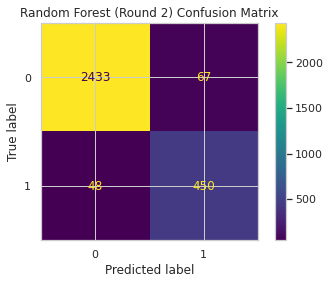

In [71]:
preds = rf2.best_estimator_.predict(X2_test)
cm = confusion_matrix(y2_test, preds, labels=rf2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf2.classes_)
disp.plot(values_format='')
plt.title('Random Forest (Round 2) Confusion Matrix')
plt.show()


The model correctly classifies most attrition cases with minimal misclassification.

### Plot the Decision Tree (tree2 best estimator)  visual check of splits.

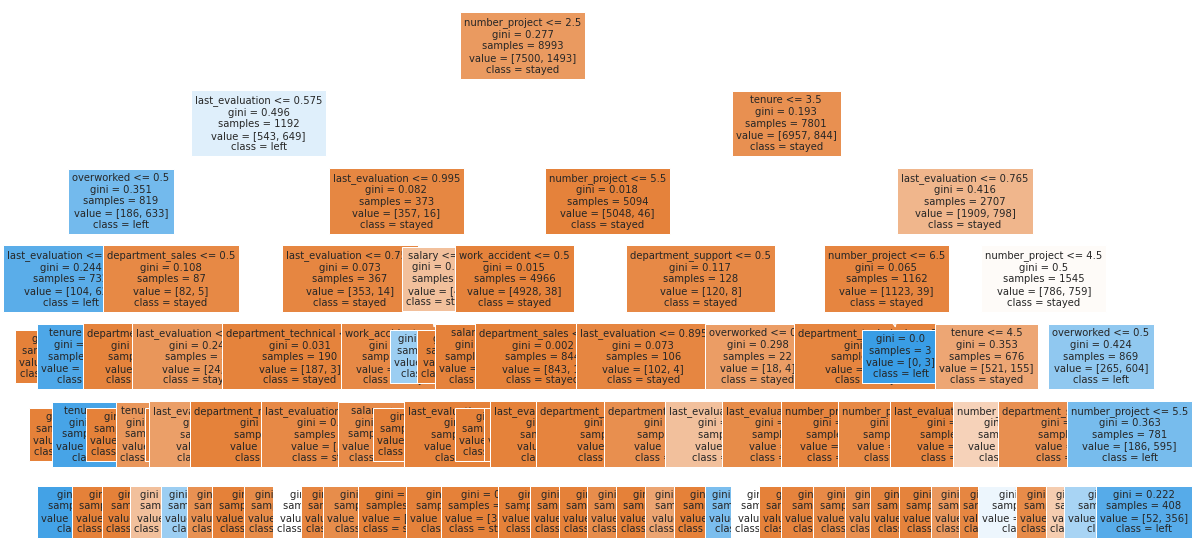

In [66]:
plt.figure(figsize=(20, 10))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=10, feature_names=X2.columns, class_names=['stayed','left'], filled=True)
plt.show()


The splits highlight workload, evaluation score, and project count as major decision points.

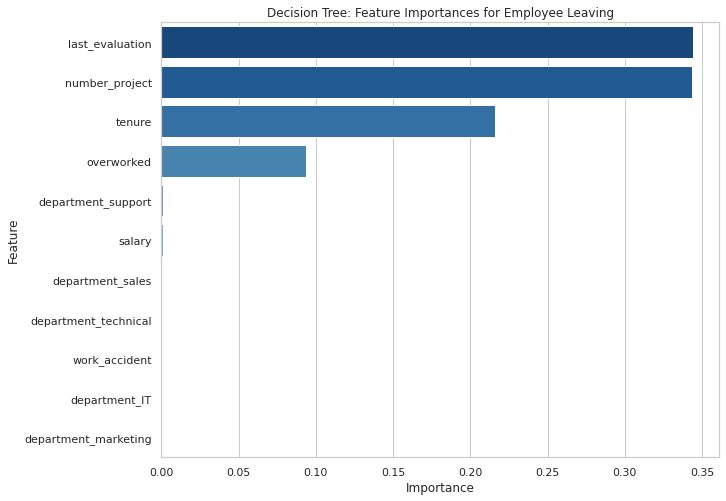

In [67]:
tree2_importances = pd.DataFrame(
    tree2.best_estimator_.feature_importances_,
    index=X2.columns,
    columns=['gini_importance']
).sort_values('gini_importance', ascending=False)

# Keep only > 0 importances
tree2_importances = tree2_importances[tree2_importances['gini_importance'] > 0]

plt.figure(figsize=(10,8))
sns.barplot(data=tree2_importances, x='gini_importance', y=tree2_importances.index, palette='Blues_r')
plt.title("Decision Tree: Feature Importances for Employee Leaving")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


Workload-related features dominate, confirming earlier EDA insights.

Random Forest Top 10 feature importances.

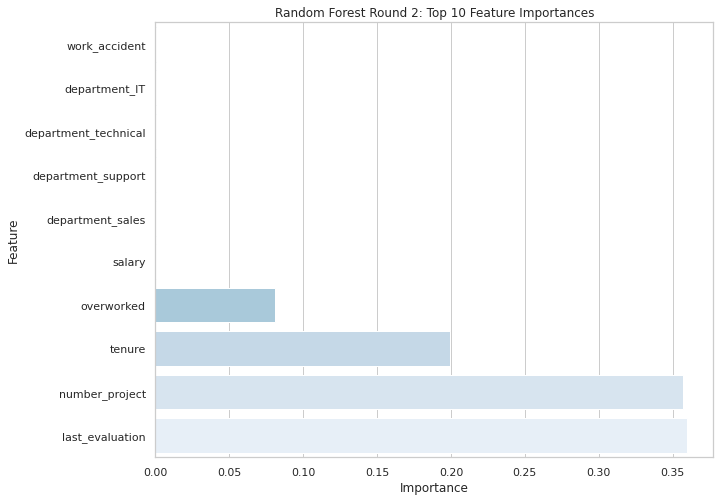

In [68]:
# Random Forest feature importances (top 10)
feat_impt_rf2 = rf2.best_estimator_.feature_importances_
ind_top = np.argpartition(feat_impt_rf2, -10)[-10:]
feat_top = X2.columns[ind_top]
feat_imp_top = feat_impt_rf2[ind_top]

feat_df = pd.DataFrame({"Feature": feat_top, "Importance": feat_imp_top}).sort_values("Importance")

plt.figure(figsize=(10,8))
sns.barplot(data=feat_df, x="Importance", y="Feature", palette="Blues_r")
plt.title("Random Forest Round 2: Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


Random Forest confirms the same trend: satisfaction-related, workload-related, and evaluation metrics are the strongest predictors of employee attrition.

# pacE: Execute Stage

💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



During the execution stage, the models surfaced some clear insights about employee turnover. The strongest signals came from workload-related and performance-related variables. Employees handling many projects, working consistently long hours, or receiving very high evaluations were more likely to leave. Promotions were strongly tied to retention, while lack of upward mobility predicted higher attrition. Tenure also behaved in an interesting non-linear way  employees around 3–4 years in the organization showed more instability compared to very new and very senior employees.

Based on these results, I would recommend the company pay closer attention to workload balancing, especially for high-performing employees. These individuals seem to be carrying a heavy share of the work, which might be pushing them toward burnout. Ensuring a more transparent promotion pathway, identifying employees who are overdue for recognition, and adjusting workloads early could significantly reduce attrition.

For my manager, I would highlight a few actionable next steps:

audit teams with consistently long working hours and redistribute workloads,

compare promotion rates across departments,

run satisfaction or engagement checks for high-performing employees who appear overloaded,

and review project allocation rules to avoid extreme outliers.

The model itself performs well, but there’s room for improvement. I could try gradient boosting or XGBoost for potentially stronger performance. More granular engineered features  such as “rapid performance changes,” “project-to-hours ratio,” or “tenure buckets” could also reveal deeper patterns. Class imbalance techniques could be tested as well, although the model already handled the data reasonably well.

Given what I’ve learned about the data, there are additional questions the team might want to explore. For example: Which departments consistently experience the longest hours? Are high-evaluation employees receiving fewer promotions than expected? Are new hires being onboarded into excessively demanding workloads? These questions could help translate the model insights into operational improvements.

Throughout this stage I used a mix of model outputs, course materials, documentation, and AI support for interpretation. Resources include:

https://scikit-learn.org/stable/

https://matplotlib.org/

https://seaborn.pydata.org/

The course exemplar notebook

Ethically, it's important to frame findings responsibly. The goal is not to blame individuals but to identify structural issues that may be affecting employee well-being. Any recommendations should focus on improving work conditions, not penalizing employees flagged “at risk” by the model.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The random forest in Round 2 emerged as the strongest overall model, balancing accuracy, recall, precision, and AUC effectively. It consistently identified employees at risk of leaving with a high degree of reliability. The most influential features included number of projects, last evaluation score, the engineered overworked variable, and tenure. Even after feature changes, the model remained stable and generalized well to the test set.

The decision tree performed reasonably but struggled once satisfaction level was removed. The random forest’s ensemble approach helped recover performance and provided smoother, more robust predictions.

### Conclusion, Recommendations, Next Steps

The analysis suggests that employee attrition in this company is heavily influenced by workload intensity, project load, and recognition structures. Burnout appears to be a key driver for strong performers who are working long hours without adequate promotions. Medium-tenure employees also seem vulnerable to turnover.

To reduce attrition, I would recommend that the company:

rebalance workloads early before they turn into burnout situations,

implement clearer promotion milestones,

monitor high-performing employees working in outlier-hour ranges,

investigate department-level workload consistency,

and redesign staffing for teams carrying unusually high project loads.

Next steps include expanding the feature set, exploring boosting models, and building dashboards so HR can monitor risk patterns in real time. Continued evaluation will help refine the model’s usefulness as the company’s workforce changes.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.